In [230]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'quality')
service = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'service')
tip = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)

quality['average'] = fuzz.gaussmf(quality.universe, 7,1.5)
quality['poor'] = fuzz.gaussmf(quality.universe, 0,3)
quality['good'] = fuzz.gaussmf(quality.universe, 10,1.5)

service['average'] = fuzz.gaussmf(quality.universe, 7,1.5)
service['poor'] = fuzz.gaussmf(quality.universe, 0,3)
service['good'] = fuzz.gaussmf(quality.universe, 10,1.5)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 15])
tip['medium'] = fuzz.trimf(tip.universe, [10, 15, 20])
tip['high'] = fuzz.trimf(tip.universe, [15, 30, 30])

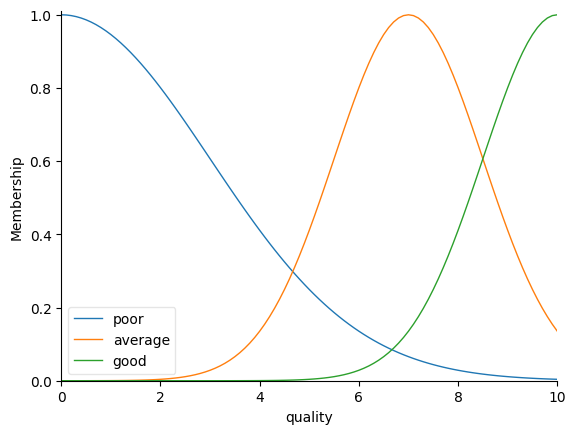

In [231]:
quality.view()

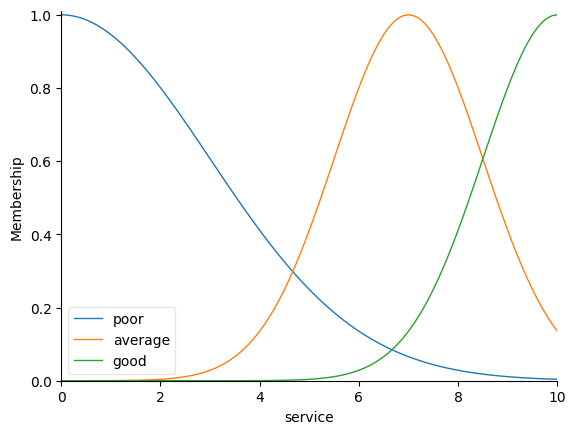

In [232]:
service.view()


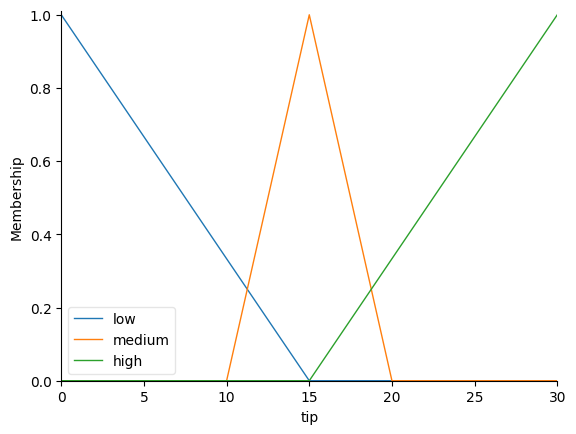

In [233]:
tip.view()


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

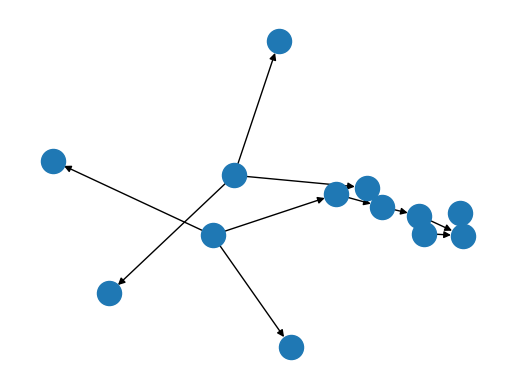

In [249]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])


rule1.view()

In [235]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


In [236]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)


In [237]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

21.698641499978162


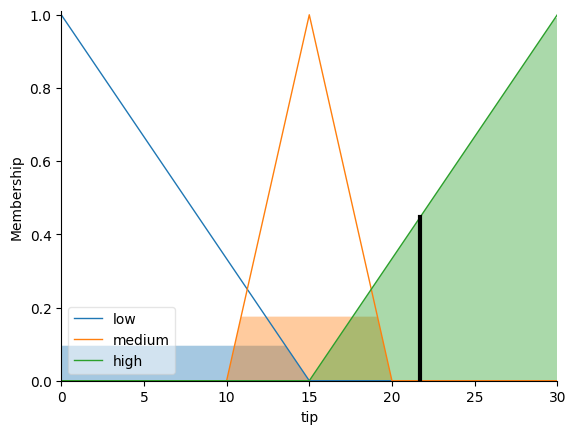

In [238]:
print (tipping.output['tip'])
tip.view(sim=tipping)

In [245]:
# #universe = np.linspace(-2, 2, 5)

# # Create the three fuzzy variables - two inputs, one output
# # error = ctrl.Antecedent(universe, 'error')
# # delta = ctrl.Antecedent(universe, 'delta')
# # output = ctrl.Consequent(universe, 'output')
# quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
# service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
# tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# # Here we use the convenience `automf` to populate the fuzzy variables with
# # terms. The optional kwarg `names=` lets us specify the names of our Terms.
# # names = ['nb', 'ns', 'ze', 'ps', 'pb']
# # error.automf(names=names)
# # delta.automf(names=names)
# # output.automf(names=names)
# quality.automf(3)
# service.automf(3)

# tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
# tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
# tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

quality = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'quality')
service = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'service')
tip = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)

quality['average'] = fuzz.gaussmf(quality.universe, 7,1.5)
quality['poor'] = fuzz.gaussmf(quality.universe, 0,3)
quality['good'] = fuzz.gaussmf(quality.universe, 10,1.5)

service['average'] = fuzz.gaussmf(quality.universe, 7,1.5)
service['poor'] = fuzz.gaussmf(quality.universe, 0,3)
service['good'] = fuzz.gaussmf(quality.universe, 10,1.5)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 15])
tip['medium'] = fuzz.trimf(tip.universe, [10, 15, 20])
tip['high'] = fuzz.trimf(tip.universe, [15, 30, 30])

In [246]:
# rule0 = ctrl.Rule(antecedent=((error['nb'] & delta['nb']) |
#                               (error['ns'] & delta['nb']) |
#                               (error['nb'] & delta['ns'])),
#                   consequent=output['nb'], label='rule nb')

# rule1 = ctrl.Rule(antecedent=((error['nb'] & delta['ze']) |
#                               (error['nb'] & delta['ps']) |
#                               (error['ns'] & delta['ns']) |
#                               (error['ns'] & delta['ze']) |
#                               (error['ze'] & delta['ns']) |
#                               (error['ze'] & delta['nb']) |
#                               (error['ps'] & delta['nb'])),
#                   consequent=output['ns'], label='rule ns')

# rule2 = ctrl.Rule(antecedent=((error['nb'] & delta['pb']) |
#                               (error['ns'] & delta['ps']) |
#                               (error['ze'] & delta['ze']) |
#                               (error['ps'] & delta['ns']) |
#                               (error['pb'] & delta['nb'])),
#                   consequent=output['ze'], label='rule ze')

# rule3 = ctrl.Rule(antecedent=((error['ns'] & delta['pb']) |
#                               (error['ze'] & delta['pb']) |
#                               (error['ze'] & delta['ps']) |
#                               (error['ps'] & delta['ps']) |
#                               (error['ps'] & delta['ze']) |
#                               (error['pb'] & delta['ze']) |
#                               (error['pb'] & delta['ns'])),
#                   consequent=output['ps'], label='rule ps')

# rule4 = ctrl.Rule(antecedent=((error['ps'] & delta['pb']) |
#                               (error['pb'] & delta['pb']) |
#                               (error['pb'] & delta['ps'])),
#                   consequent=output['pb'], label='rule pb')


rule1 = ctrl.Rule(quality['poor'] | service['poor'], consequent=tip['low'], label='rule low')
rule2 = ctrl.Rule(service['average'], consequent=tip['medium'], label='rule medium')
rule3 = ctrl.Rule(service['good'] | quality['good'], consequent=tip['high'], label='rule high')






In [247]:
system = ctrl.ControlSystem(rules=[rule1, rule2, rule3])

# Later we intend to run this system with a 21*21 set of inputs, so we allow
# that many plus one unique runs before results are flushed.
# Subsequent runs would return in 1/8 the time!
sim = ctrl.ControlSystemSimulation(system, flush_after_run=10 * 10 + 1)

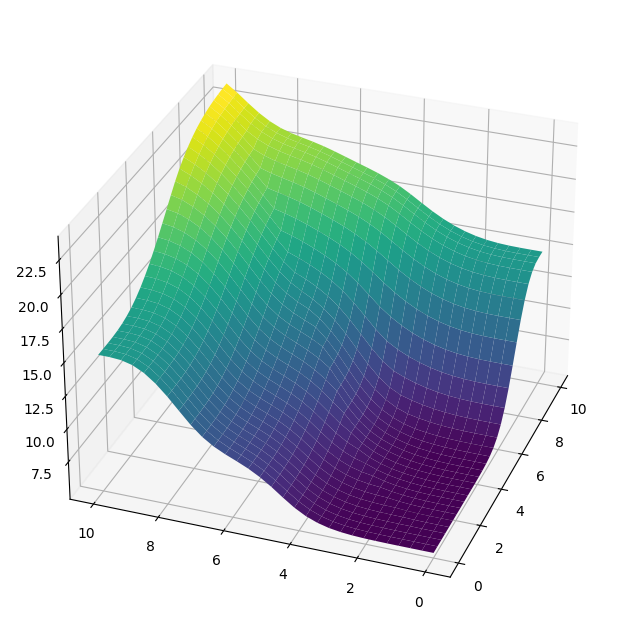

In [250]:
upsampled = np.linspace(0, 10,30)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

# Loop through the system 21*21 times to collect the control surface
for i in range(30):
    for j in range(30):
        sim.input['quality'] = x[i, j]
        sim.input['service'] = y[i, j]
        sim.compute()
        z[i, j] = sim.output['tip']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=0, cmap='viridis', alpha=0)
cset = ax.contourf(x, y, z, zdir='x', offset=0, cmap='viridis', alpha=0)
cset = ax.contourf(x, y, z, zdir='y', offset=0, cmap='viridis', alpha=0)

ax.view_init(30, 200)